# Probabilistic logic and statistical inference
# Random number generators and hacker statistics

## 1. Generating random numbers using the np.random module:
We will be hammering the `np.random` module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, `np.random.random()` for a test spin. The function returns a random number between zero and one. Call `np.random.random()` a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument `size=4` to `np.random.random()`. Such an approach is more efficient than a `for` loop: in this exercise, however, you will write a `for` loop to experience hacker statistics as the practice of repeating an experiment over and over again.

### Instructions:
* Seed the random number generator using the seed `42`.
* Initialize an empty array, `random_numbers`, of 100,000 entries to store the random numbers. Make sure you use `np.empty(100000)` to do this.
* Write a `for` loop to draw 100,000 random numbers using `np.random.random()`, storing them in the `random_numbers` array. To do so, loop over `range(100000)`.
* Plot a histogram of `random_numbers`. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit 'Submit Answer' to show your plot.

In [1]:
# Import modules:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

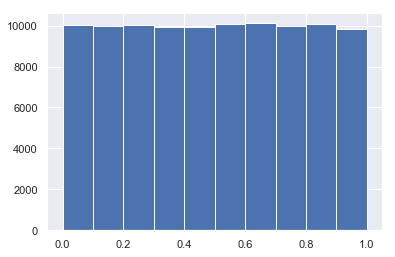

In [2]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

## 2. The np.random module and Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). In this exercise, you will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the number of successes out of `n` Bernoulli trials, each of which has probability `p` of success. To perform each Bernoulli trial, use the `np.random.random()` function, which returns a random number between zero and one.

### Instructions:
* Define a function with signature `perform_bernoulli_trials(n, p)`.
    * Initialize to zero a `variable n_success` the counter of `True` s, which are Bernoulli trial successes.
    * Write a `for` loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is `True`. Perform `n` iterations by looping over `range(n)`.
        * To perform a Bernoulli trial, choose a random number between zero and one using `np.random.random()`. If the number you chose is less than `p`, increment `n_success` (use the `+= 1` operator to achieve this).
    * The function returns the number of successes `n_success`.

In [3]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success+=1

    return n_success

## 3. How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the `perform_bernoulli_trials()` function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to `True`, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

### Instructions:
* Seed the random number generator to 42.
* Initialize `n_defaults`, an empty array, `using np.empty()`. It should contain 1000 entries, since we are doing 1000 simulations.
* Write a `for` loop with `1000` iterations to compute the number of defaults per 100 loans using the `perform_bernoulli_trials()` function. It accepts two arguments: the number of trials `n` - in this case 100 - and the probability of success `p` - in this case the probability of a default, which is `0.05`. On each iteration of the loop store the result in an entry of `n_defaults`.
* Plot a histogram of `n_defaults`. Include the `normed=True` keyword argument so that the height of the bars of the histogram indicate the probability.

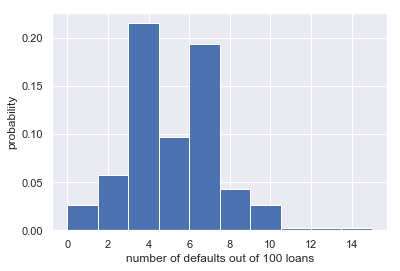

In [4]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this in forthcoming exercises.

## 4. Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as `n_defaults`, as a CDF. The `ecdf()` function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

### Instructions:
* Compute the `x` and `y` values for the ECDF of `n_defaults`.
* Plot the ECDF, making sure to label the axes. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` in your call `plt.plot()`.
* Show the plot.
* Compute the total number of entries in your `n_defaults` array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of `n_defaults` is >= `10`. Then sum all the entries in this array using `np.sum()`. For example, `np.sum(n_defaults <= 5)` would compute the number of defaults with 5 or _fewer_ defaults.
* The probability that the bank loses money is the fraction of `n_defaults` that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

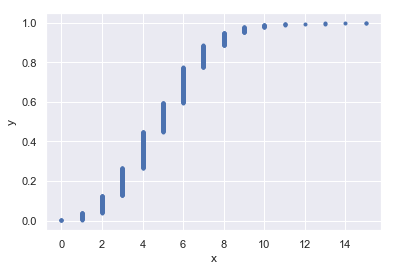

Probability of losing money = 0.022


In [6]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.